In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
import pylab
import seaborn as sns
from scipy.stats import linregress

In [2]:
# read HR-Employee-Attrition file
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.tsv.txt", sep='\t')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df = df.drop(labels=['Over18','StandardHours','EmployeeCount'],axis=1)

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [4]:
#we have to separate categorical and continuous variables by checking 
#the type of each column, also made a total list of all columns


def seperation(df):
    
    cat = []
    con = []
    df_col = []
    
    for i in df.columns:
        
        df_col.append(i),
        
        if df[i].dtype=='object':
            cat.append(i)
        else:
            con.append(i)
    return cat, con, df_col

In [5]:
#fill up the empty lists by setting both cat, con to function made
cat, con, df_col = seperation(df)

In [6]:
#histogram for each numerical column and counts in each range

def uni_histo(num):
    num = con[num]
    df.hist(num, grid = False)
    plt.xlabel(num)
    plt.ylabel('Count')
    plt.show()
    


In [7]:
def job_line_means(num):
    
    num = con[num]
    
    job_means = df.groupby("Attrition").mean()
    job_means = job_means.reset_index()
    job_means
    
    return job_means

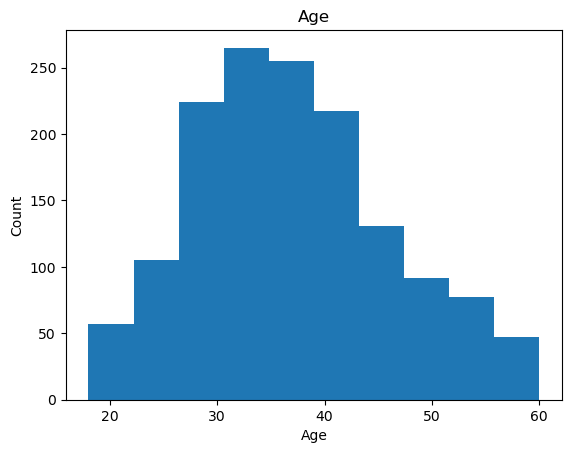

In [8]:
uni_histo(0)

In [9]:
#finds averages of all columns grouped by attrition and jobrole and puts them in df

def job_line_means(num):
    
    num = con[num]
    
    job_means = df.groupby(["Attrition", 'JobRole']).mean()
    job_means = job_means.reset_index()
    job_means
    
    return job_means

In [10]:

#for graphs about about job_line_means function 

def job_linegraph(num):
    
    num = con[num]
    
    job_means = df.groupby(["Attrition", 'JobRole']).mean()
    job_means = job_means.reset_index()
    job_means

     
    #get to plotting
    job_list = job_means["JobRole"]
    job_list = job_list.drop_duplicates()
    job_list = job_list.tolist()
    
    job_no = job_means[job_means['Attrition'].str.contains('No')]
    job_no = job_no[num]
    job_no = job_no.tolist()
    
    
    
    job_yes = job_means[job_means['Attrition'].str.contains('Yes')]
    job_yes = job_yes[num]
    job_yes = job_yes.tolist()
    
    plt.plot(job_list, job_no, label = "kept job")
    plt.plot(job_list, job_yes, label = 'left job')
    
    plt.title("Rates based on Attrition by Job Role")
    plt.xlabel("Jobs")
    plt.ylabel(num)
    plt.xticks(rotation = 'vertical')
    
    plt.legend()   
    plt.show()

In [11]:
#finds averages of all columns grouped by attrition and jobrole and puts them in df

def education_line_means(num):
    
    num = con[num]
    
    edu_means = df.groupby(["Attrition", 'Education']).mean()
    edu_means = edu_means.reset_index()
    edu_means
    
    return job_means

In [12]:
job_line_means(1)

,Attrition,JobRole,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Healthcare Representative,39.877049,869.811475,9.204918,3.040984,1081.836066,2.819672,66.278689,2.737705,...,3.155738,2.713115,0.844262,13.901639,2.786885,2.704918,8.188525,4.852459,2.885246,4.590164
1,No,Human Resources,37.125000,760.325000,6.600000,2.850000,1222.950000,2.675000,64.550000,2.775000,...,3.150000,2.925000,0.725000,8.800000,2.700000,2.925000,5.675000,3.475000,1.400000,3.675000
2,No,Laboratory Technician,34.944162,794.720812,9.329949,2.786802,1016.482234,2.822335,67.091371,2.746193,...,3.147208,2.695431,0.913706,8.142132,3.040609,2.817259,5.604061,3.538071,1.548223,3.725888
3,No,Manager,46.783505,778.123711,7.927835,3.051546,954.587629,2.814433,66.432990,2.804124,...,3.206186,2.783505,0.752577,24.701031,2.845361,2.762887,14.371134,6.381443,4.835052,6.185567
4,No,Manufacturing Director,38.222222,802.518519,9.533333,2.851852,992.222222,2.940741,64.888889,2.688889,...,3.200000,2.762963,0.814815,12.629630,2.755556,2.770370,7.518519,5.081481,2.148148,4.940741
5,No,Research Director,43.858974,801.923077,8.474359,3.115385,1003.846154,2.487179,64.371795,2.769231,...,3.102564,2.653846,0.871795,21.141026,2.820513,2.858974,10.538462,6.064103,2.910256,6.025641
6,No,Research Scientist,34.567347,817.555102,8.869388,2.918367,1010.444898,2.746939,66.457143,2.853061,...,3.151020,2.791837,0.836735,8.020408,2.665306,2.669388,5.265306,3.481633,1.440816,3.277551
7,No,Sales Executive,36.758364,813.910781,9.026022,3.000000,1040.832714,2.732342,65.955390,2.754647,...,3.130112,2.724907,0.881041,11.104089,2.869888,2.858736,7.665428,4.996283,2.360595,4.847584
8,No,Sales Representative,32.060000,862.340000,9.000000,2.580000,1071.260000,2.760000,63.700000,2.780000,...,3.160000,2.500000,0.740000,5.460000,3.060000,2.780000,3.460000,2.520000,1.360000,2.000000
9,Yes,Healthcare Representative,38.888889,643.333333,17.666667,2.333333,979.222222,2.111111,74.444444,2.666667,...,3.111111,2.444444,0.666667,16.333333,2.222222,2.666667,10.888889,5.000000,4.111111,4.333333


In [13]:
def education_linegraph(num):
    
    num = con[num]
    
    edu_means = df.groupby(["Attrition", 'Education']).mean()
    edu_means = edu_means.reset_index()
    edu_means

     
    #get to plotting
    edu_list = edu_means["Education"]
    edu_list = edu_list.drop_duplicates()
    edu_list = edu_list.tolist()
    
    edu_no = edu_means[edu_means['Attrition'].str.contains('No')]
    edu_no = edu_no[num]
    edu_no = edu_no.tolist()
    
    
    
    edu_yes = edu_means[edu_means['Attrition'].str.contains('Yes')]
    edu_yes = edu_yes[num]
    edu_yes = edu_yes.tolist()
    
    plt.plot(edu_list, edu_no, label = "kept job")
    plt.plot(edu_list, edu_yes, label = 'left job')
    
    plt.title("Rates based on Attrition by Job Role")
    plt.xlabel("Education")
    plt.ylabel(num)
    plt.xticks(rotation = 'vertical')
    
    plt.legend()   
    plt.show()

In [14]:
def categorical_dataframes(num , y):
    
    num = cat[num]
    y = df_col[y]
    
    cat_means = df.groupby(["Attrition", num]).mean()
    cat_means = cat_means.reset_index()
    cat_means
    
    print("category: " + num)
    print("df column: " + y)
    
    return cat_means

In [15]:
categorical_dataframes(3,17)

category: EducationField
df column: MonthlyIncome


,Attrition,EducationField,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Human Resources,39.400000,677.550000,6.600000,3.100000,1102.800000,2.700000,60.550000,2.850000,...,3.100000,3.050000,0.850000,14.050000,2.500000,2.700000,8.400000,4.400000,2.050000,4.250000
1,No,Life Sciences,37.553191,818.789168,8.754352,2.930368,1025.940039,2.765957,66.669246,2.767892,...,3.152805,2.709865,0.829787,11.725338,2.756286,2.754352,7.315280,4.584139,2.168279,4.353965
2,No,Marketing,38.919355,731.064516,9.451613,3.185484,990.661290,2.806452,67.685484,2.750000,...,3.153226,2.725806,0.903226,12.758065,2.701613,2.814516,8.064516,4.814516,2.435484,4.919355
3,No,Medical,37.379052,832.002494,9.087282,2.827930,1021.027431,2.710723,65.189526,2.785536,...,3.164589,2.770574,0.867830,12.027431,3.004988,2.780549,7.413965,4.269327,2.341646,4.244389
4,No,Other,35.830986,792.647887,8.661972,3.070423,1072.436620,2.957746,61.957746,2.704225,...,3.169014,2.633803,0.718310,10.929577,2.774648,2.887324,6.549296,4.084507,1.619718,4.098592
5,No,Technical Degree,37.510000,843.900000,9.040000,2.850000,1062.160000,2.880000,67.070000,2.780000,...,3.110000,2.730000,0.850000,11.030000,2.810000,2.820000,6.980000,4.720000,2.370000,4.460000
6,Yes,Human Resources,30.285714,668.714286,16.000000,3.142857,1402.000000,2.571429,61.857143,2.428571,...,3.142857,3.000000,1.142857,4.571429,2.285714,2.857143,2.142857,1.142857,0.428571,0.857143
7,Yes,Life Sciences,34.516854,720.988764,10.123596,2.921348,1015.640449,2.247191,67.775281,2.528090,...,3.191011,2.550562,0.460674,8.460674,2.640449,2.573034,5.123596,2.707865,2.235955,2.887640
8,Yes,Marketing,34.400000,716.400000,12.428571,2.914286,1032.314286,2.428571,60.714286,2.485714,...,3.057143,2.571429,0.657143,8.657143,2.657143,2.742857,5.771429,3.342857,1.571429,2.857143
9,Yes,Medical,33.396825,764.222222,11.047619,2.650794,992.587302,2.539683,65.857143,2.507937,...,3.142857,2.698413,0.634921,8.619048,2.476190,2.650794,5.142857,2.936508,2.000000,2.904762


In [16]:
edu_means = df.groupby(["Attrition", "JobRole"]).mean()
edu_means = edu_means.reset_index()
edu_means

,Attrition,JobRole,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Healthcare Representative,39.877049,869.811475,9.204918,3.040984,1081.836066,2.819672,66.278689,2.737705,...,3.155738,2.713115,0.844262,13.901639,2.786885,2.704918,8.188525,4.852459,2.885246,4.590164
1,No,Human Resources,37.125000,760.325000,6.600000,2.850000,1222.950000,2.675000,64.550000,2.775000,...,3.150000,2.925000,0.725000,8.800000,2.700000,2.925000,5.675000,3.475000,1.400000,3.675000
2,No,Laboratory Technician,34.944162,794.720812,9.329949,2.786802,1016.482234,2.822335,67.091371,2.746193,...,3.147208,2.695431,0.913706,8.142132,3.040609,2.817259,5.604061,3.538071,1.548223,3.725888
3,No,Manager,46.783505,778.123711,7.927835,3.051546,954.587629,2.814433,66.432990,2.804124,...,3.206186,2.783505,0.752577,24.701031,2.845361,2.762887,14.371134,6.381443,4.835052,6.185567
4,No,Manufacturing Director,38.222222,802.518519,9.533333,2.851852,992.222222,2.940741,64.888889,2.688889,...,3.200000,2.762963,0.814815,12.629630,2.755556,2.770370,7.518519,5.081481,2.148148,4.940741
5,No,Research Director,43.858974,801.923077,8.474359,3.115385,1003.846154,2.487179,64.371795,2.769231,...,3.102564,2.653846,0.871795,21.141026,2.820513,2.858974,10.538462,6.064103,2.910256,6.025641
6,No,Research Scientist,34.567347,817.555102,8.869388,2.918367,1010.444898,2.746939,66.457143,2.853061,...,3.151020,2.791837,0.836735,8.020408,2.665306,2.669388,5.265306,3.481633,1.440816,3.277551
7,No,Sales Executive,36.758364,813.910781,9.026022,3.000000,1040.832714,2.732342,65.955390,2.754647,...,3.130112,2.724907,0.881041,11.104089,2.869888,2.858736,7.665428,4.996283,2.360595,4.847584
8,No,Sales Representative,32.060000,862.340000,9.000000,2.580000,1071.260000,2.760000,63.700000,2.780000,...,3.160000,2.500000,0.740000,5.460000,3.060000,2.780000,3.460000,2.520000,1.360000,2.000000
9,Yes,Healthcare Representative,38.888889,643.333333,17.666667,2.333333,979.222222,2.111111,74.444444,2.666667,...,3.111111,2.444444,0.666667,16.333333,2.222222,2.666667,10.888889,5.000000,4.111111,4.333333


In [17]:
        edu_means = df.groupby(["Attrition", "JobRole"]).mean()
        edu_means = edu_means.reset_index()
        edu_means

     
    
        edu_list = edu_means['JobRole']
        edu_list = edu_list.drop_duplicates()
        edu_list = edu_list.tolist()
    
        edu_no = edu_means[edu_means['Attrition'].str.contains('No')]
        edu_no = edu_no[df_col[5]]
        edu_no = edu_no.tolist()
    
    
    
        edu_yes = edu_means[edu_means['Attrition'].str.contains('Yes')]
        edu_yes = edu_yes[df_col[5]]
        edu_yes = edu_yes.tolist()
        
        ed_df  = pd.DataFrame({'x axis': edu_list, "kept job": edu_no, 'left job':edu_yes})
        
        ed_df
    

,x axis,kept job,left job
0,Healthcare Representative,9.204918,17.666667
1,Human Resources,6.600000,13.416667
2,Laboratory Technician,9.329949,9.661290
3,Manager,7.927835,10.000000
4,Manufacturing Director,9.533333,8.800000
5,Research Director,8.474359,7.000000
6,Research Scientist,8.869388,9.765957
7,Sales Executive,9.026022,12.649123
8,Sales Representative,9.000000,8.151515


In [23]:
# matches any numerical value with any column in dataframe and makes a bar graph showcasing the difference 
#between those that attrited and those that did not

def categorical_bargraph(x , y):
    
    try:
        x = cat[x]
        y = con[y]
    
        edu_means = df.groupby(["Attrition", x]).mean()
        edu_means = edu_means.reset_index()
        edu_means

     
    
        edu_list = edu_means[x]
        edu_list = edu_list.drop_duplicates()
        edu_list = edu_list.tolist()
        
    
        edu_no = edu_means[edu_means['Attrition'].str.contains('No')]
        edu_no = edu_no[y]
        edu_no = edu_no.tolist()
        edu_no = [ '%.2f' % elem for elem in edu_no ]
    
    
        edu_yes = edu_means[edu_means['Attrition'].str.contains('Yes')]
        edu_yes = edu_yes[y]
        edu_yes = edu_yes.tolist()
        edu_yes = [ '%.2f' % elem for elem in edu_yes ]
        
        index = edu_list
        ed_df  = pd.DataFrame({"kept job": edu_no, 'left job':edu_yes}, index = index)
        
        #ed_df.plot.bar(rot = 0)
        
        
        plt.title("Rates based on Attrition by " + y + " and " + x)
        plt.xlabel(y)
        plt.ylabel(x)
        plt.xticks(rotation = 'vertical')
        
        ax = ed_df.plot.bar(rot = 0)
        git 
        
        ax.bar_label(ax.containers[0], label_type='edge')
       
    
        plt.title("Rates based on Attrition by " + y + " and " + x)
        plt.xlabel(y)
        plt.ylabel(x)
        plt.xticks(rotation = 'vertical')
        
        plt.legend()   
        plt.show()
        
    except:
        print("An exception occured with mismatching x and y values")
    

An exception occured with mismatching x and y values


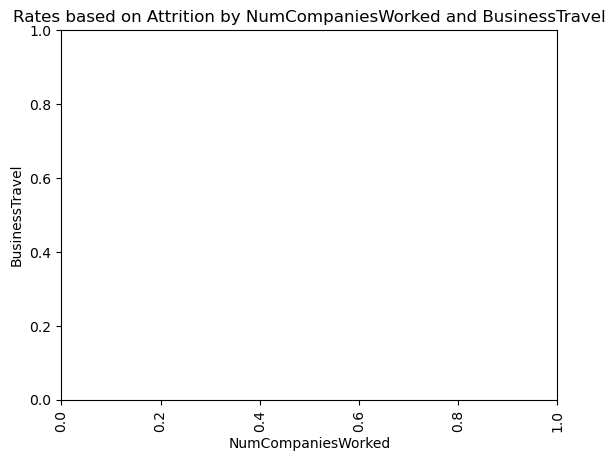

In [24]:
#the first parameter is what category column you want in the x axis,
#and the second parameter is the numerical column you want to compare it to 

categorical_bargraph(1 , 12)

In [20]:
cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [21]:
edu_means = df.groupby(["Attrition","JobRole"]).mean()
edu_means = edu_means.reset_index()
edu_means

,Attrition,JobRole,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,No,Healthcare Representative,39.877049,869.811475,9.204918,3.040984,1081.836066,2.819672,66.278689,2.737705,...,3.155738,2.713115,0.844262,13.901639,2.786885,2.704918,8.188525,4.852459,2.885246,4.590164
1,No,Human Resources,37.125000,760.325000,6.600000,2.850000,1222.950000,2.675000,64.550000,2.775000,...,3.150000,2.925000,0.725000,8.800000,2.700000,2.925000,5.675000,3.475000,1.400000,3.675000
2,No,Laboratory Technician,34.944162,794.720812,9.329949,2.786802,1016.482234,2.822335,67.091371,2.746193,...,3.147208,2.695431,0.913706,8.142132,3.040609,2.817259,5.604061,3.538071,1.548223,3.725888
3,No,Manager,46.783505,778.123711,7.927835,3.051546,954.587629,2.814433,66.432990,2.804124,...,3.206186,2.783505,0.752577,24.701031,2.845361,2.762887,14.371134,6.381443,4.835052,6.185567
4,No,Manufacturing Director,38.222222,802.518519,9.533333,2.851852,992.222222,2.940741,64.888889,2.688889,...,3.200000,2.762963,0.814815,12.629630,2.755556,2.770370,7.518519,5.081481,2.148148,4.940741
5,No,Research Director,43.858974,801.923077,8.474359,3.115385,1003.846154,2.487179,64.371795,2.769231,...,3.102564,2.653846,0.871795,21.141026,2.820513,2.858974,10.538462,6.064103,2.910256,6.025641
6,No,Research Scientist,34.567347,817.555102,8.869388,2.918367,1010.444898,2.746939,66.457143,2.853061,...,3.151020,2.791837,0.836735,8.020408,2.665306,2.669388,5.265306,3.481633,1.440816,3.277551
7,No,Sales Executive,36.758364,813.910781,9.026022,3.000000,1040.832714,2.732342,65.955390,2.754647,...,3.130112,2.724907,0.881041,11.104089,2.869888,2.858736,7.665428,4.996283,2.360595,4.847584
8,No,Sales Representative,32.060000,862.340000,9.000000,2.580000,1071.260000,2.760000,63.700000,2.780000,...,3.160000,2.500000,0.740000,5.460000,3.060000,2.780000,3.460000,2.520000,1.360000,2.000000
9,Yes,Healthcare Representative,38.888889,643.333333,17.666667,2.333333,979.222222,2.111111,74.444444,2.666667,...,3.111111,2.444444,0.666667,16.333333,2.222222,2.666667,10.888889,5.000000,4.111111,4.333333


In [22]:
categorical_linegraph(1,11)

NameError: name 'categorical_linegraph' is not defined

In [ ]:
def attrition_count(num):
    
    num = cat[num]
    
    Count =  df.groupby([num,"Attrition"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    return Count

In [ ]:
attrition_count(1)

In [ ]:
#makes a stacked bar graph showing how many people kept and left the job 

def attrition_count_bargraph(num):
    
    num = cat[num]
    
    Count =  df.groupby([num, "Attrition"]).Age.count()
    Count = pd.DataFrame({"Count": Count})
    Count = Count.reset_index()
    
    
    att_list = Count[num]
    att_list = att_list.drop_duplicates()
    att_list = att_list.tolist()
    



    att_no = Count[Count["Attrition"].str.contains('No')]
    att_no = att_no['Count']
    att_no = att_no.tolist()
    



    att_yes = Count[Count["Attrition"].str.contains('Yes')]
    att_yes = att_yes['Count']
    att_yes = att_yes.tolist()
    
    
    
    plt.bar(att_list, att_no, color='green')
    plt.bar(att_list, att_yes, bottom= att_no, color='red',)
    plt.xticks(rotation = 'vertical')

    labels = ["Kept job", "Left job"]
    plt.legend(labels)

    plt.show()


In [ ]:
#shows how many people are males and how many are females 
def gender_pie():
    gender_df= df.groupby('Gender').Attrition.count()
    gender_df = gender_df.reset_index()
    gender_df
    
    labels = gender_df['Gender']

    colors = ["red", "lime"]

    gender_pie = gender_df.plot(kind = 'pie', 
           y = "Attrition",
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)

In [ ]:
def attrition_pie():
    
    all_att = df.groupby('Attrition').Gender.count()
    all_att = pd.DataFrame({"count": all_att})
    all_att = all_att.reset_index()

    labels = ["Kept job", "Left job"]
    colors = ["lime", "red"]

    all_att.plot(kind = 'pie',y = "count", 
           autopct = '%1.0f%%', 
           labels = labels,
           colors = colors, 
           startangle = 0)
    

In [ ]:


def pie_by_male():
    
    gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()
    gender_att = pd.DataFrame({"Count": gender1})
    gender_att.reset_index() 

    Male_attrition = gender_att.iloc[2:]
    Male_attrition = Male_attrition.reset_index()

    
    
    
    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(Male_attrition['Count'], labels= ['kept job', 'left job'], autopct='%.1f%%',
          wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    
    plt.setp(pcts, color='white', fontweight='bold')
    
    
    ax.set_title('Males by Attrition')
    plt.tight_layout()
    
    
    
    

In [ ]:
def pie_by_female():
    
    gender1 = df.groupby(['Gender', 'Attrition']).Attrition.count()
    gender_att = pd.DataFrame({"Count": gender1})
    gender_att.reset_index()
    
    Female_attrition = gender_att.iloc[:2]
    Female_attrition = Female_attrition.reset_index()
    
    
    
    fig, ax = plt.subplots()
    patches, texts, pcts = ax.pie(Female_attrition['Count'], 
                                  labels=['kept job', 'left job'],
                                  autopct='%.1f%%',
                                  wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
    ax.set_title('Female by attrition')
    
    plt.setp(pcts, color='white', fontweight='bold')
    plt.tight_layout()
    
pie_by_female()

In [ ]:
#scatterplots 

categorical_dataframes(3,3)

In [ ]:
cat

In [ ]:
#groupby columns and find means of all numerical columns 

def scatter_func(i,j):
   
    
    try:
        
        df_means = df.groupby([cat[i], cat[j]]).mean()
        df_means = df_means.reset_index()
        
    except:
        print("Can't have the same i and j value")
        
    
    return df_means



In [ ]:
cat

In [ ]:
scatter_func(1,3)

In [ ]:


def scatter_plot(i,j, k = "EducationLevel" , l = "MonthlyIncome" ):
    
    try:
        df_means = scatter_func(i,j)
        correlation = st.pearsonr(df_means[k], df_means[l])
        correlation = round(correlation[0],2)
        print(f"The correlation is {correlation}")
        x_values = df_means[k]
        y_values = df_means[l]
    
    
        plt.scatter(x_values, y_values , color = "steelblue")
        plt.xlabel(k)
        plt.ylabel(l)

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        plt.plot(x_values,regress_values,"r-")
        
    except:  
        return df_col[i], df_col[j], 
        plt.show()
    
        print("Remeber you cannot have a i,j value greater than 7")

In [ ]:
scatter_func(7,6 )

In [ ]:
scatter_plot(3,6, "PerformanceRating","EnvironmentSatisfaction")

